<a href="https://colab.research.google.com/github/SShalini24/Logistic-Regression/blob/main/Diabetes_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [74]:
data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Display First 5 Rows of the Dataset**

In [75]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Display Last 5 Rows of the Dataset**

In [76]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Shape of the Datatset**

In [77]:
data.shape

(768, 9)

**Checking the Null Values**

In [78]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Checking the Information about the Dataset**

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Checking the Statistical Details of the Dataset**

In [80]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Exploratory Data Analyst**

### **Univariate Analysis**

In [81]:
!pip install sweetviz

## **Bivariate Analysis**

In [82]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Pregnancies', ylabel='count'>

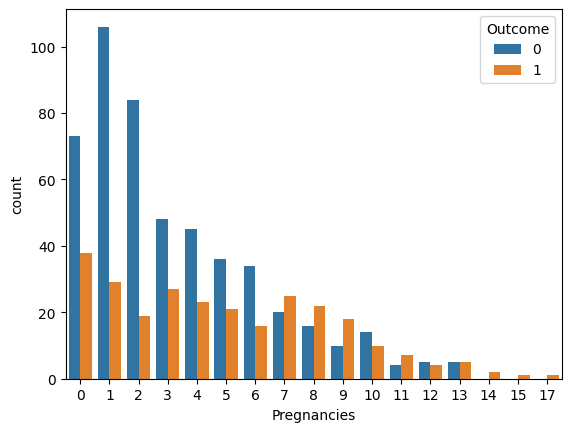

In [83]:
# Analyze Pregnancies with the target variable
sns.countplot(x=data.Pregnancies,hue =data.Outcome)

In [84]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [85]:
data1 = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

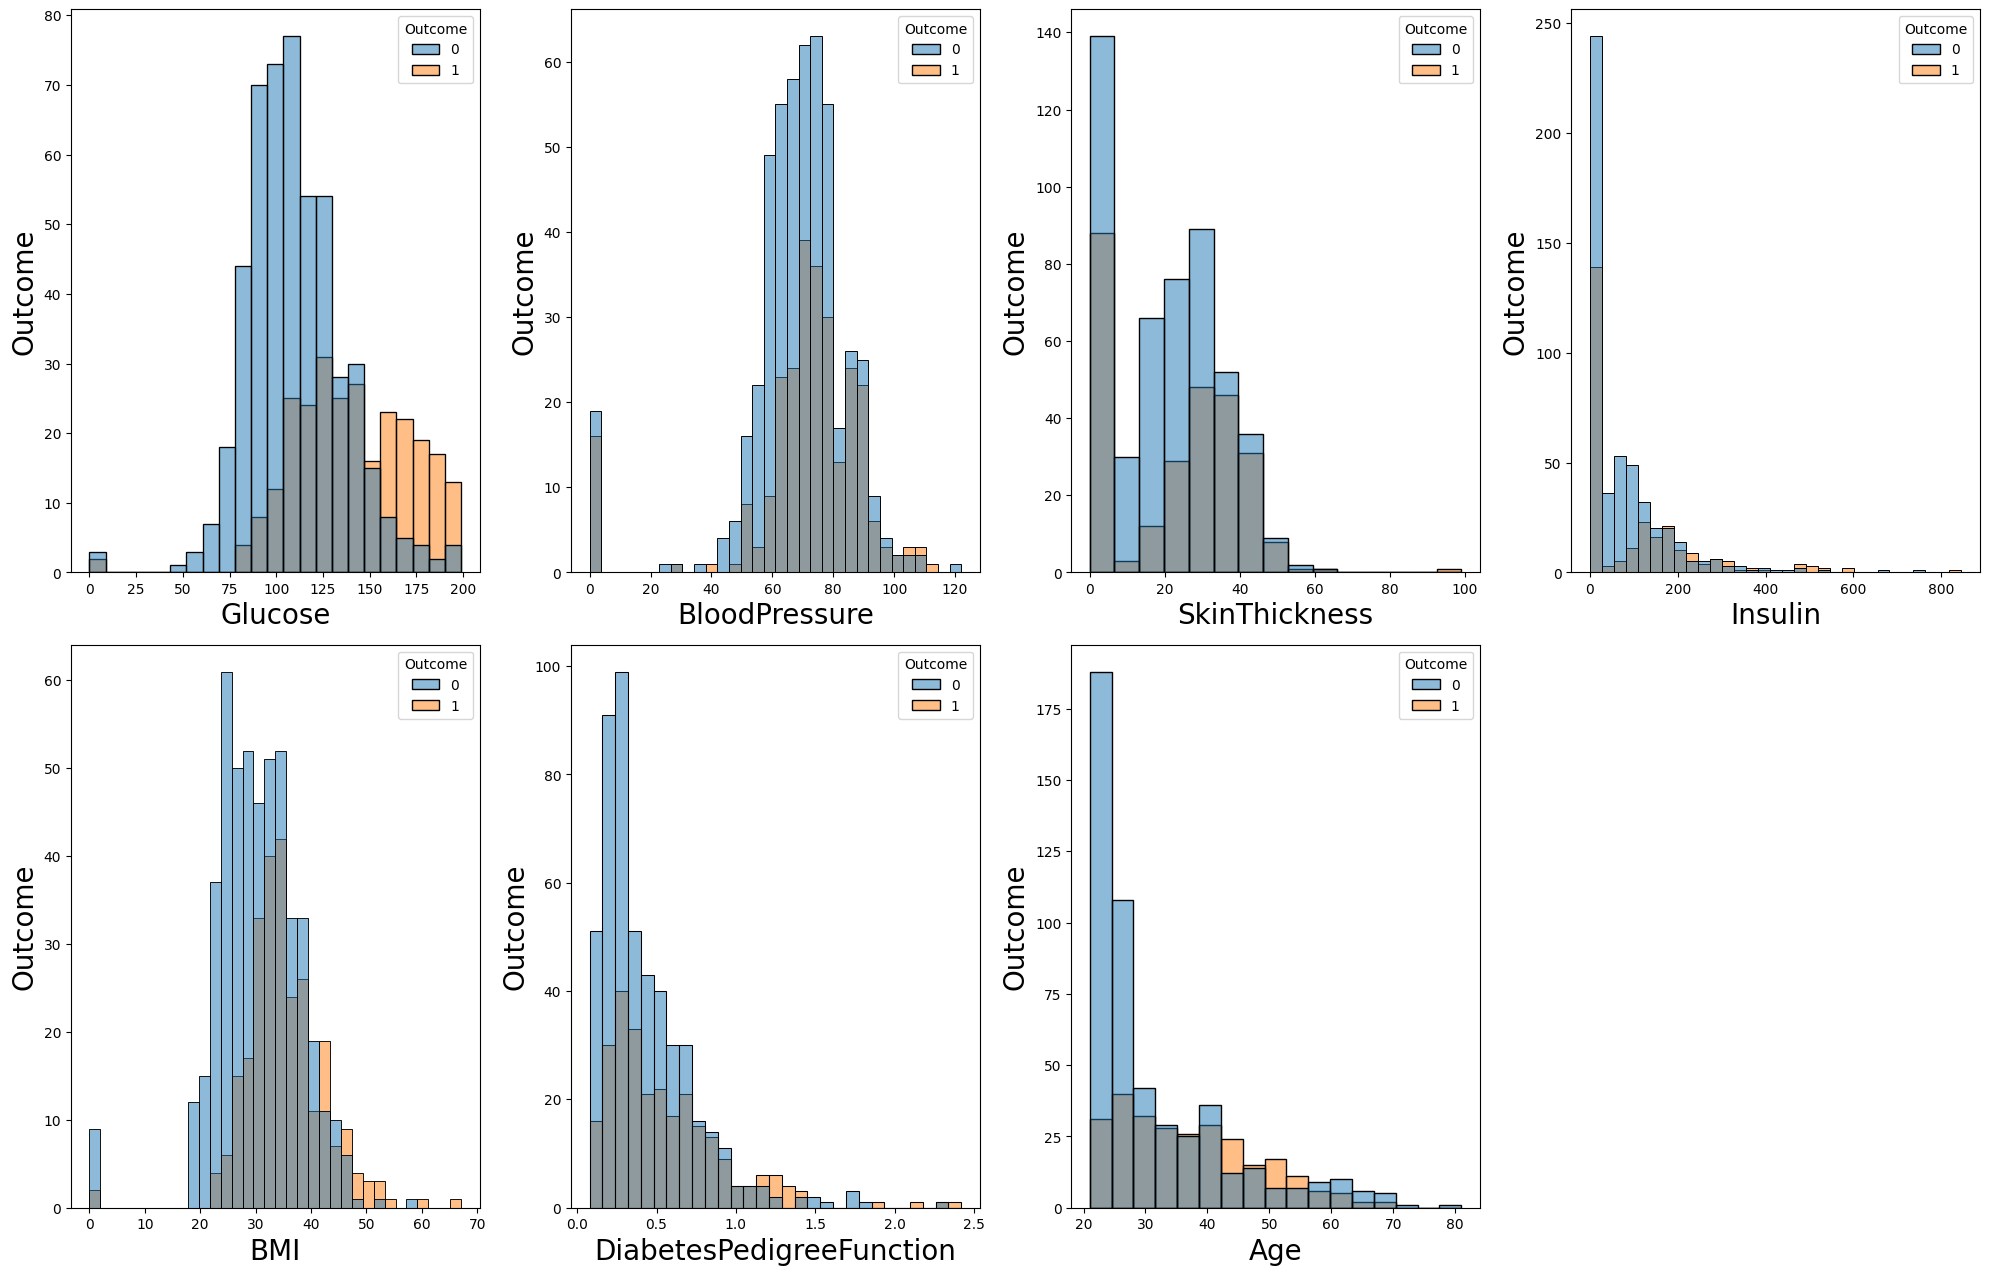

In [86]:
plt.figure(figsize=(20,25),facecolor ='white')
plotnumber =1

for column in data1:
  if plotnumber <=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.histplot(x=data[column],
                        hue=data.Outcome)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Outcome',fontsize=20)
  plotnumber+=1
plt.tight_layout()

## **Data Preprocessing**

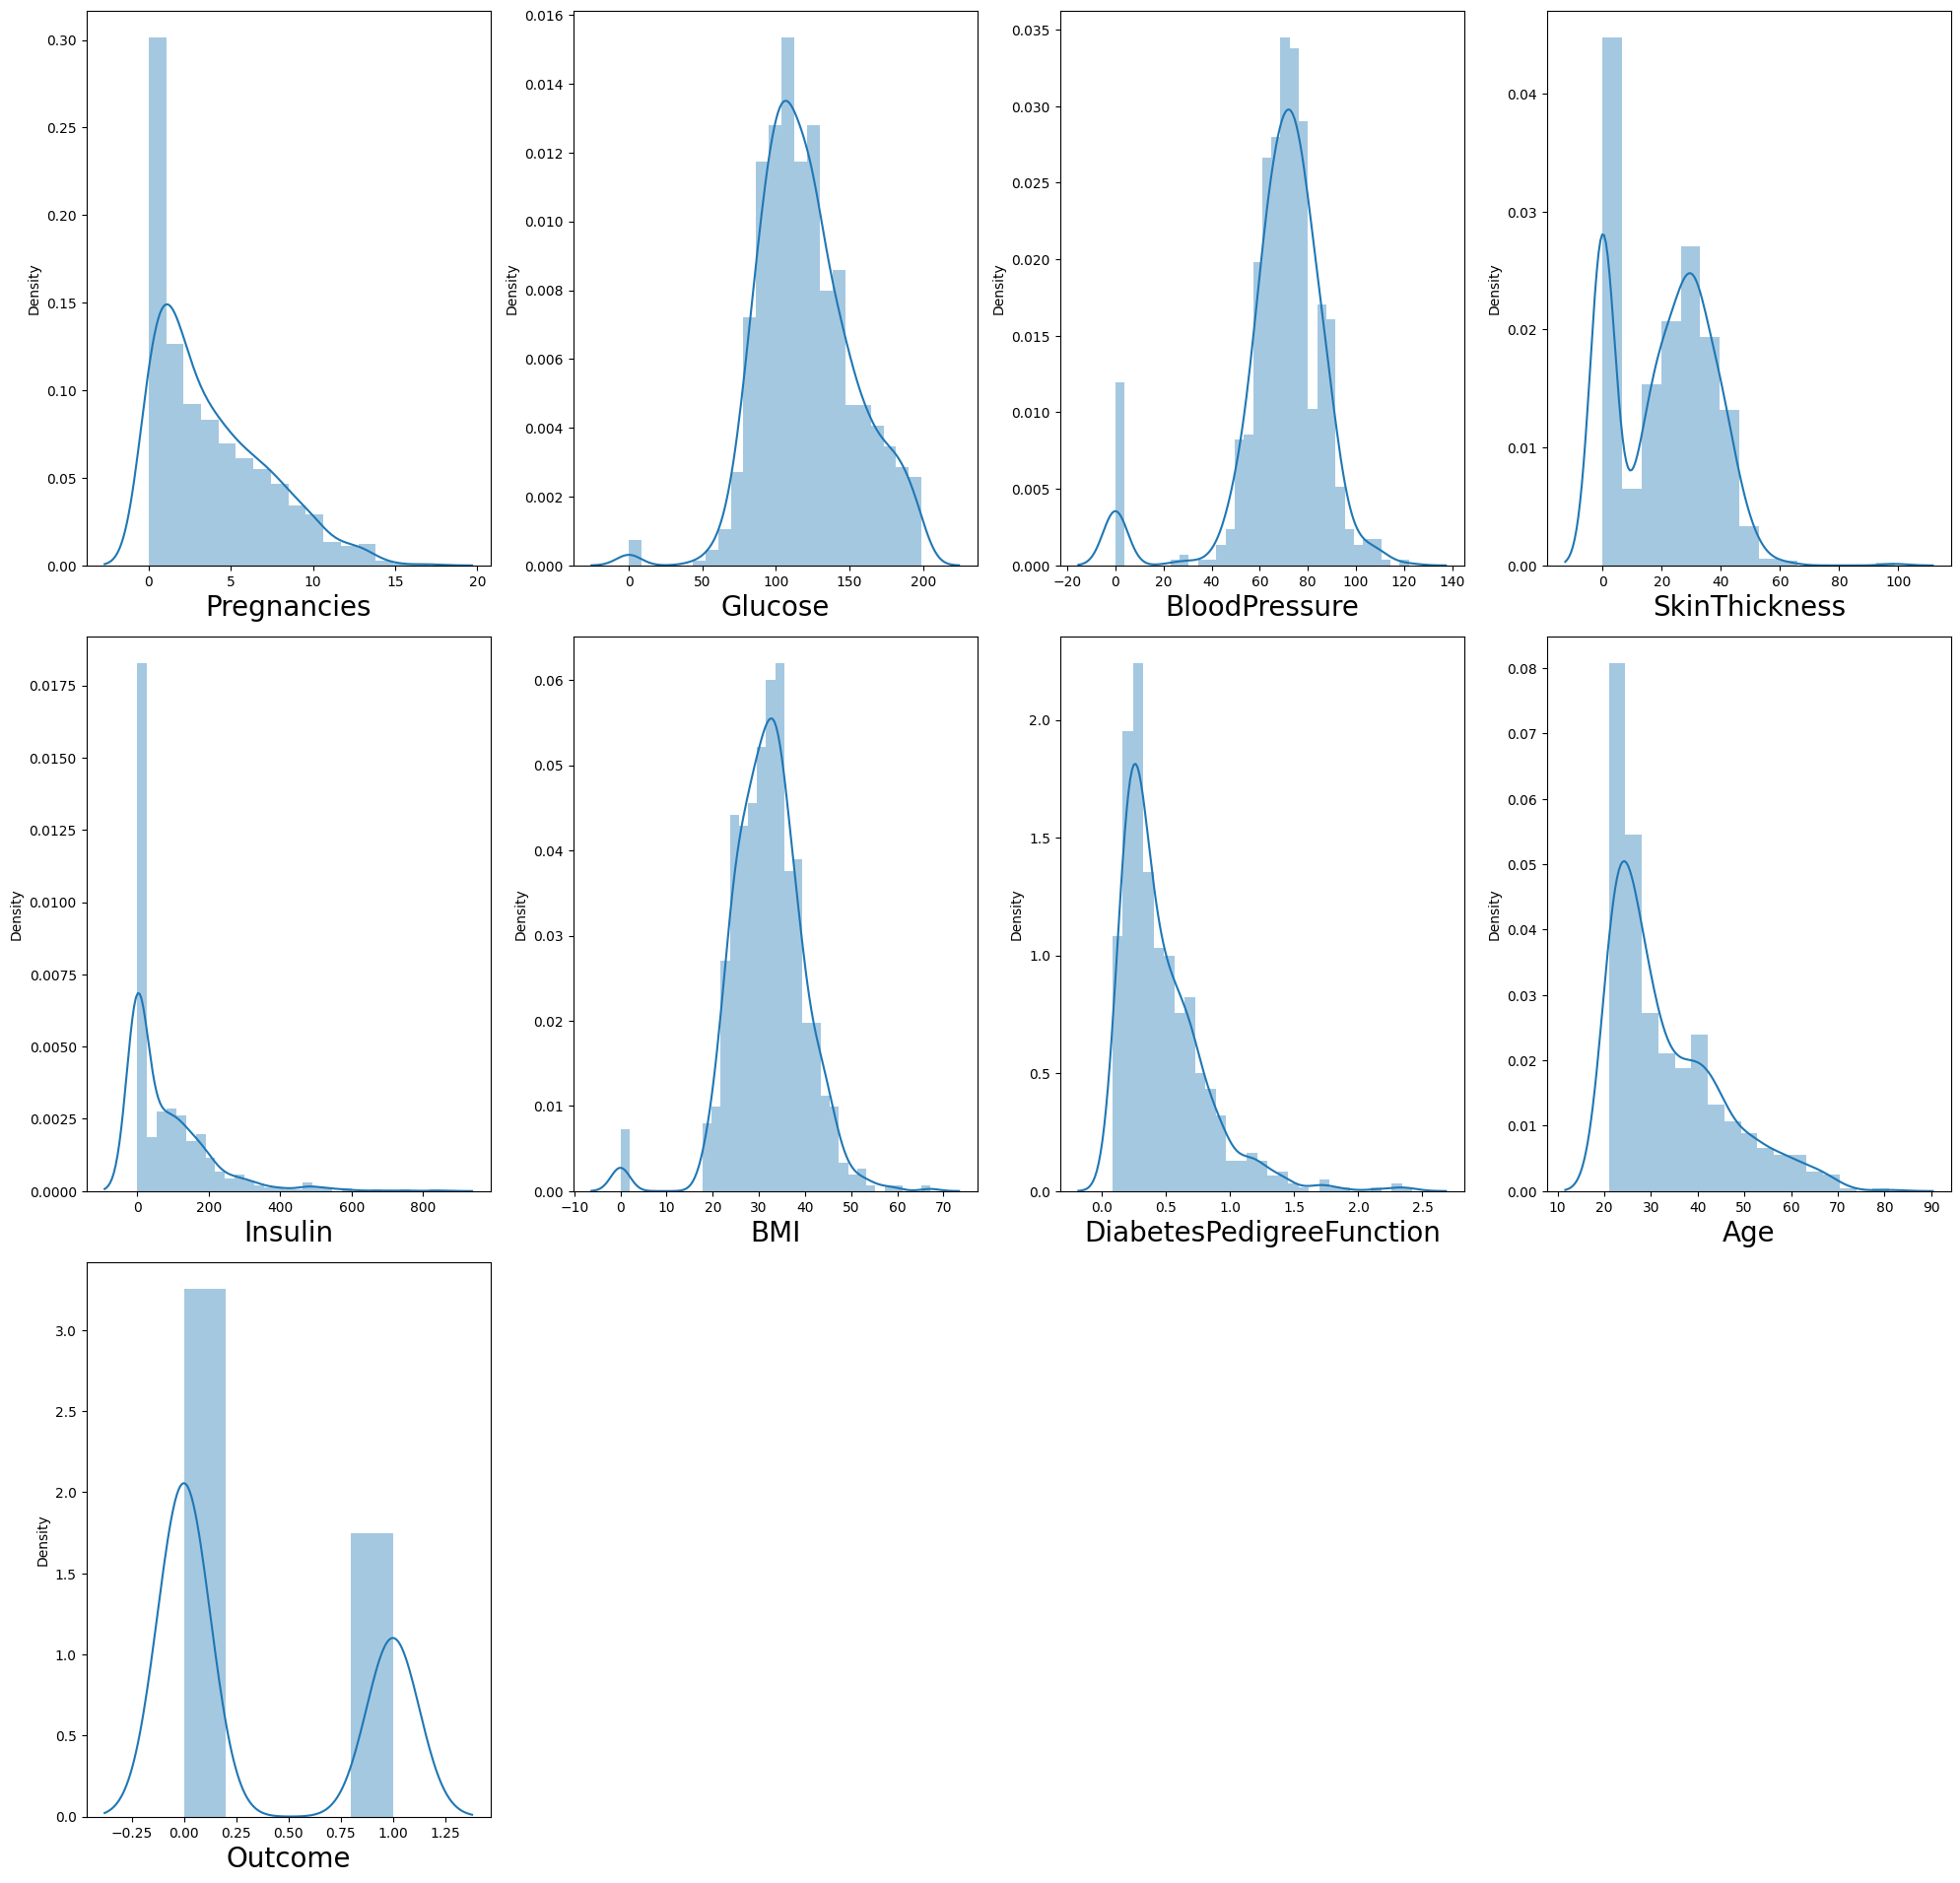

In [87]:
# Lets Check how data is distributed for every columns
plt.figure(figsize=(20,25),facecolor ='white')
plotnumber = 1

for column in data:
  if plotnumber<=9:
    ax = plt .subplot(4,4,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

In [88]:
# Lets check the BMI 0 rows
data.loc[data['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [89]:
data['BMI'].mean()

31.992578124999998

In [90]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())

In [91]:
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

In [92]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())


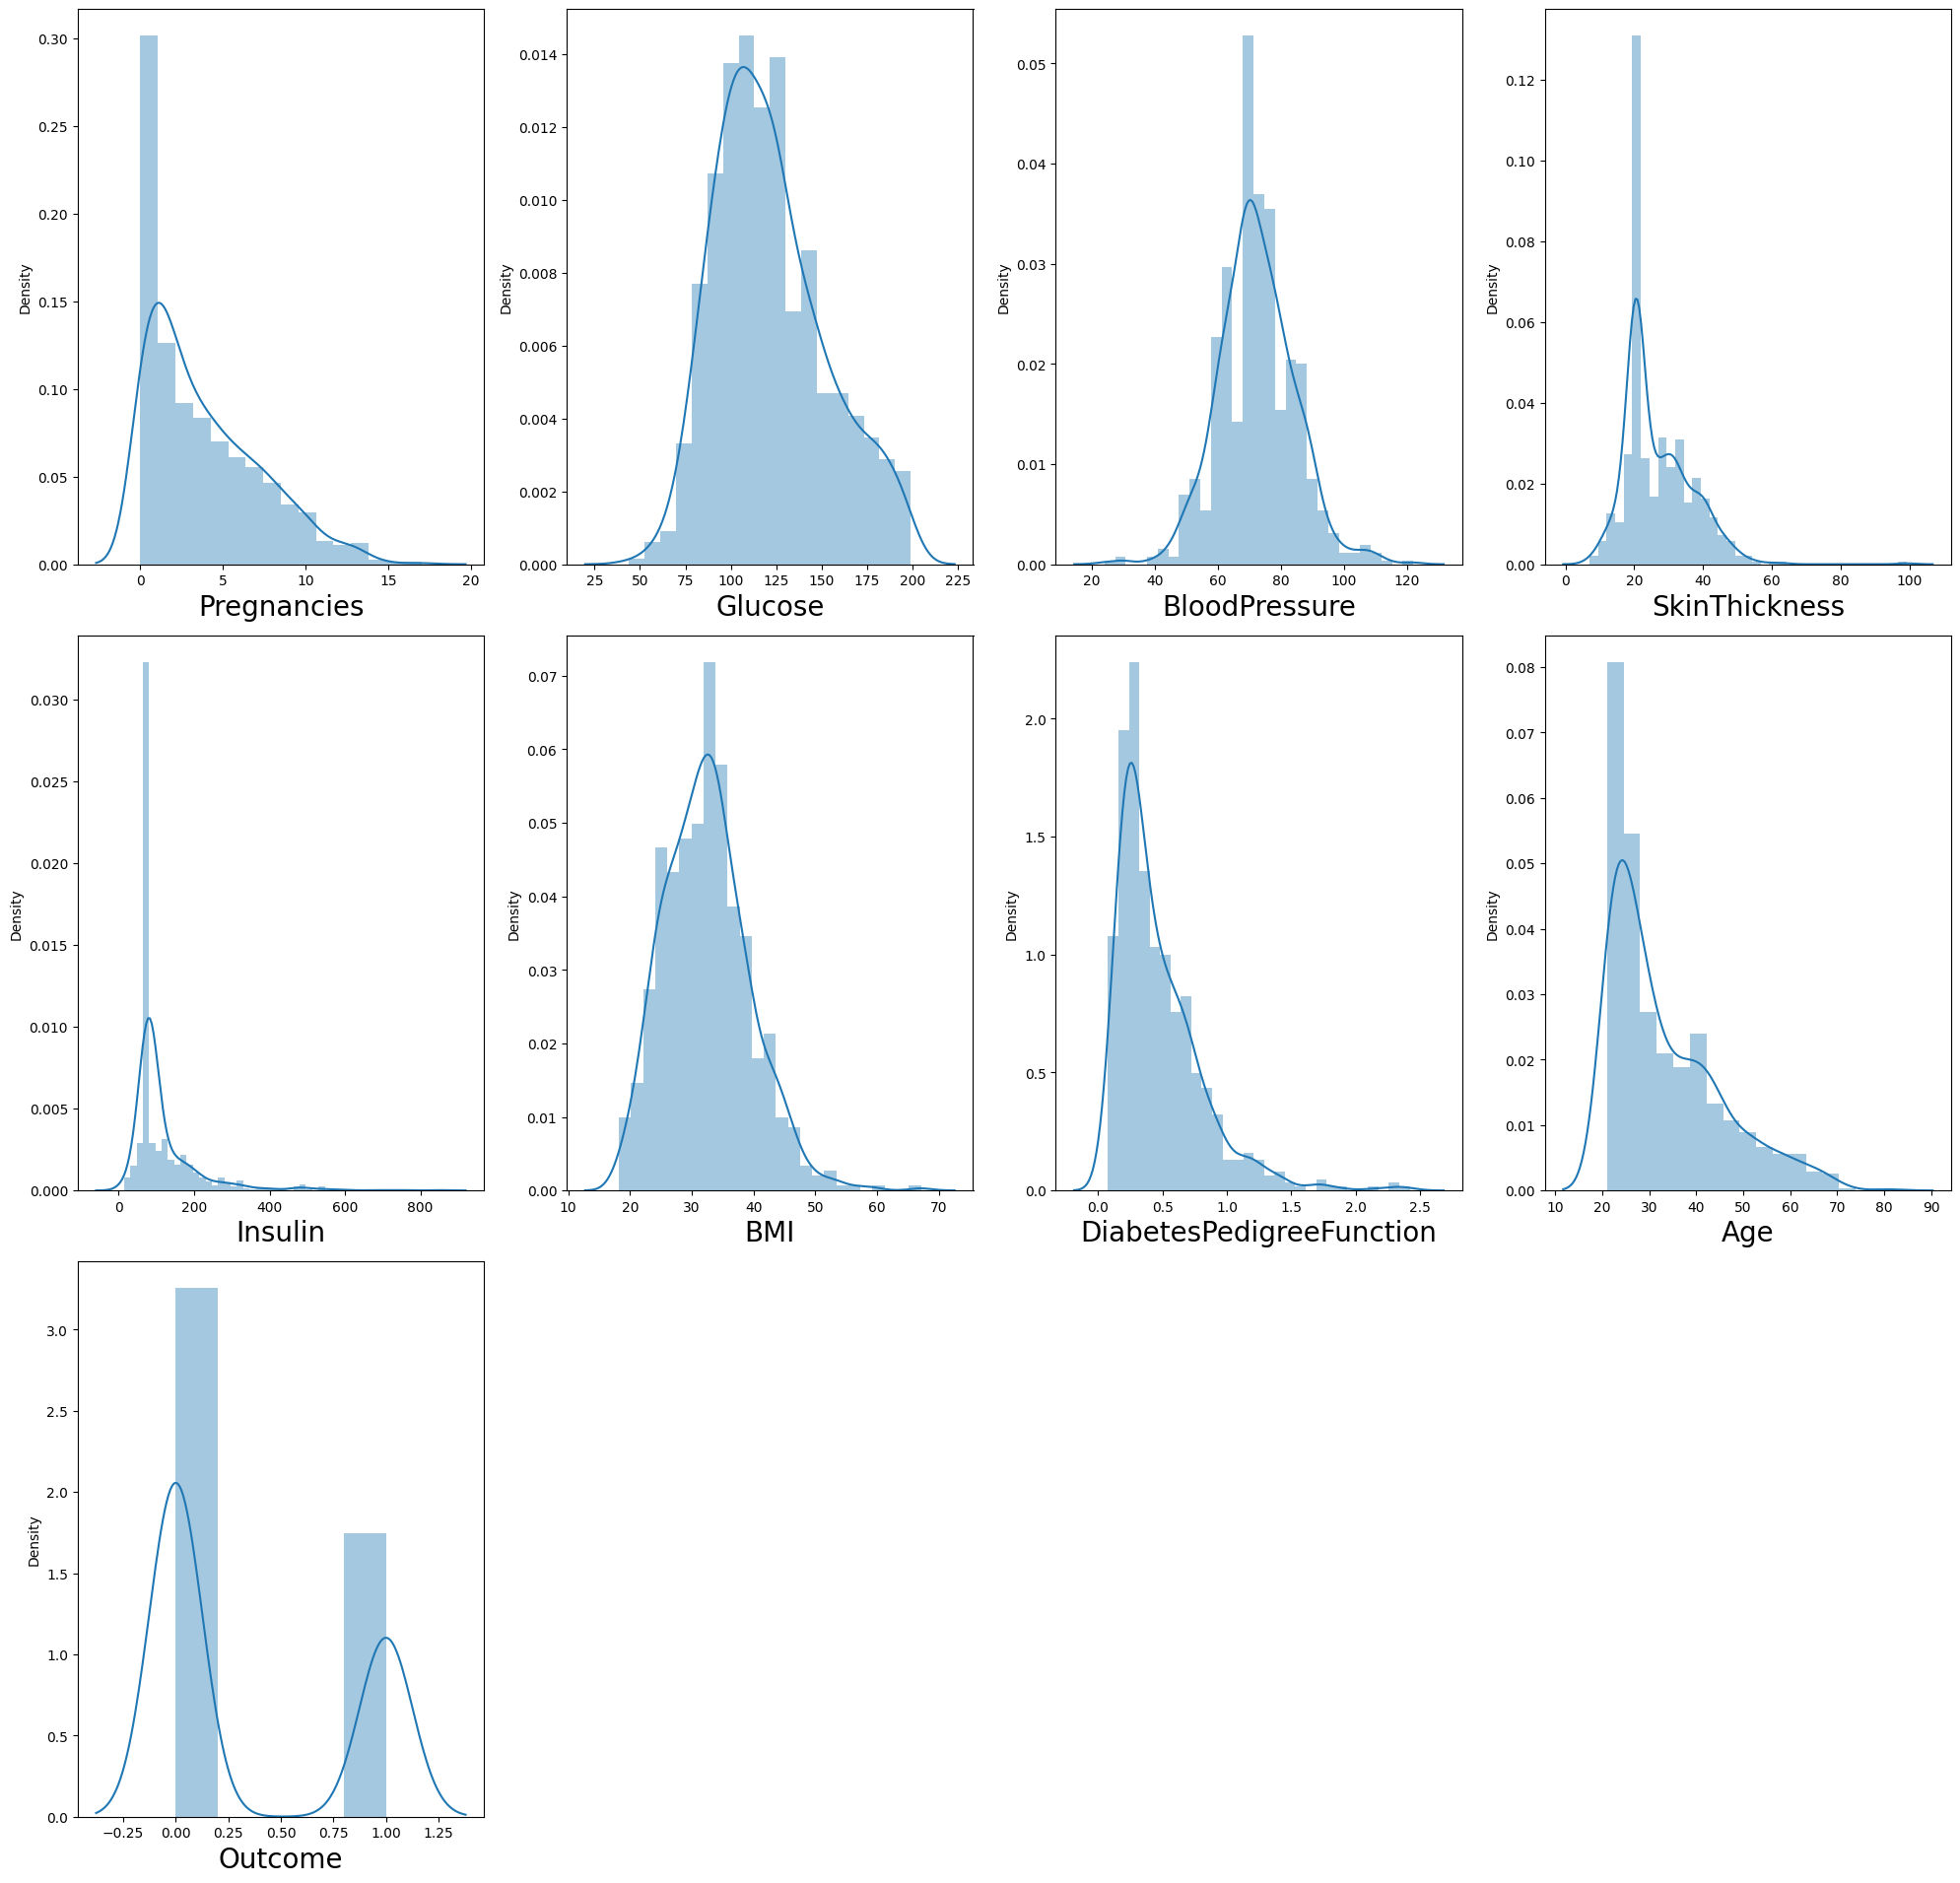

In [93]:
# Let see how the data is distributed now
plt.figure(figsize=(20,25),facecolor ='white')
plotnumber = 1

for column in data:
  if plotnumber <=9:
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize =20)
  plotnumber+=1
plt.tight_layout()

The data looks much better than before.We will start our analysis with this data now as we dont want to loose important information . If our model doesn't work with accuracy, we will comeback with more preprocessing.

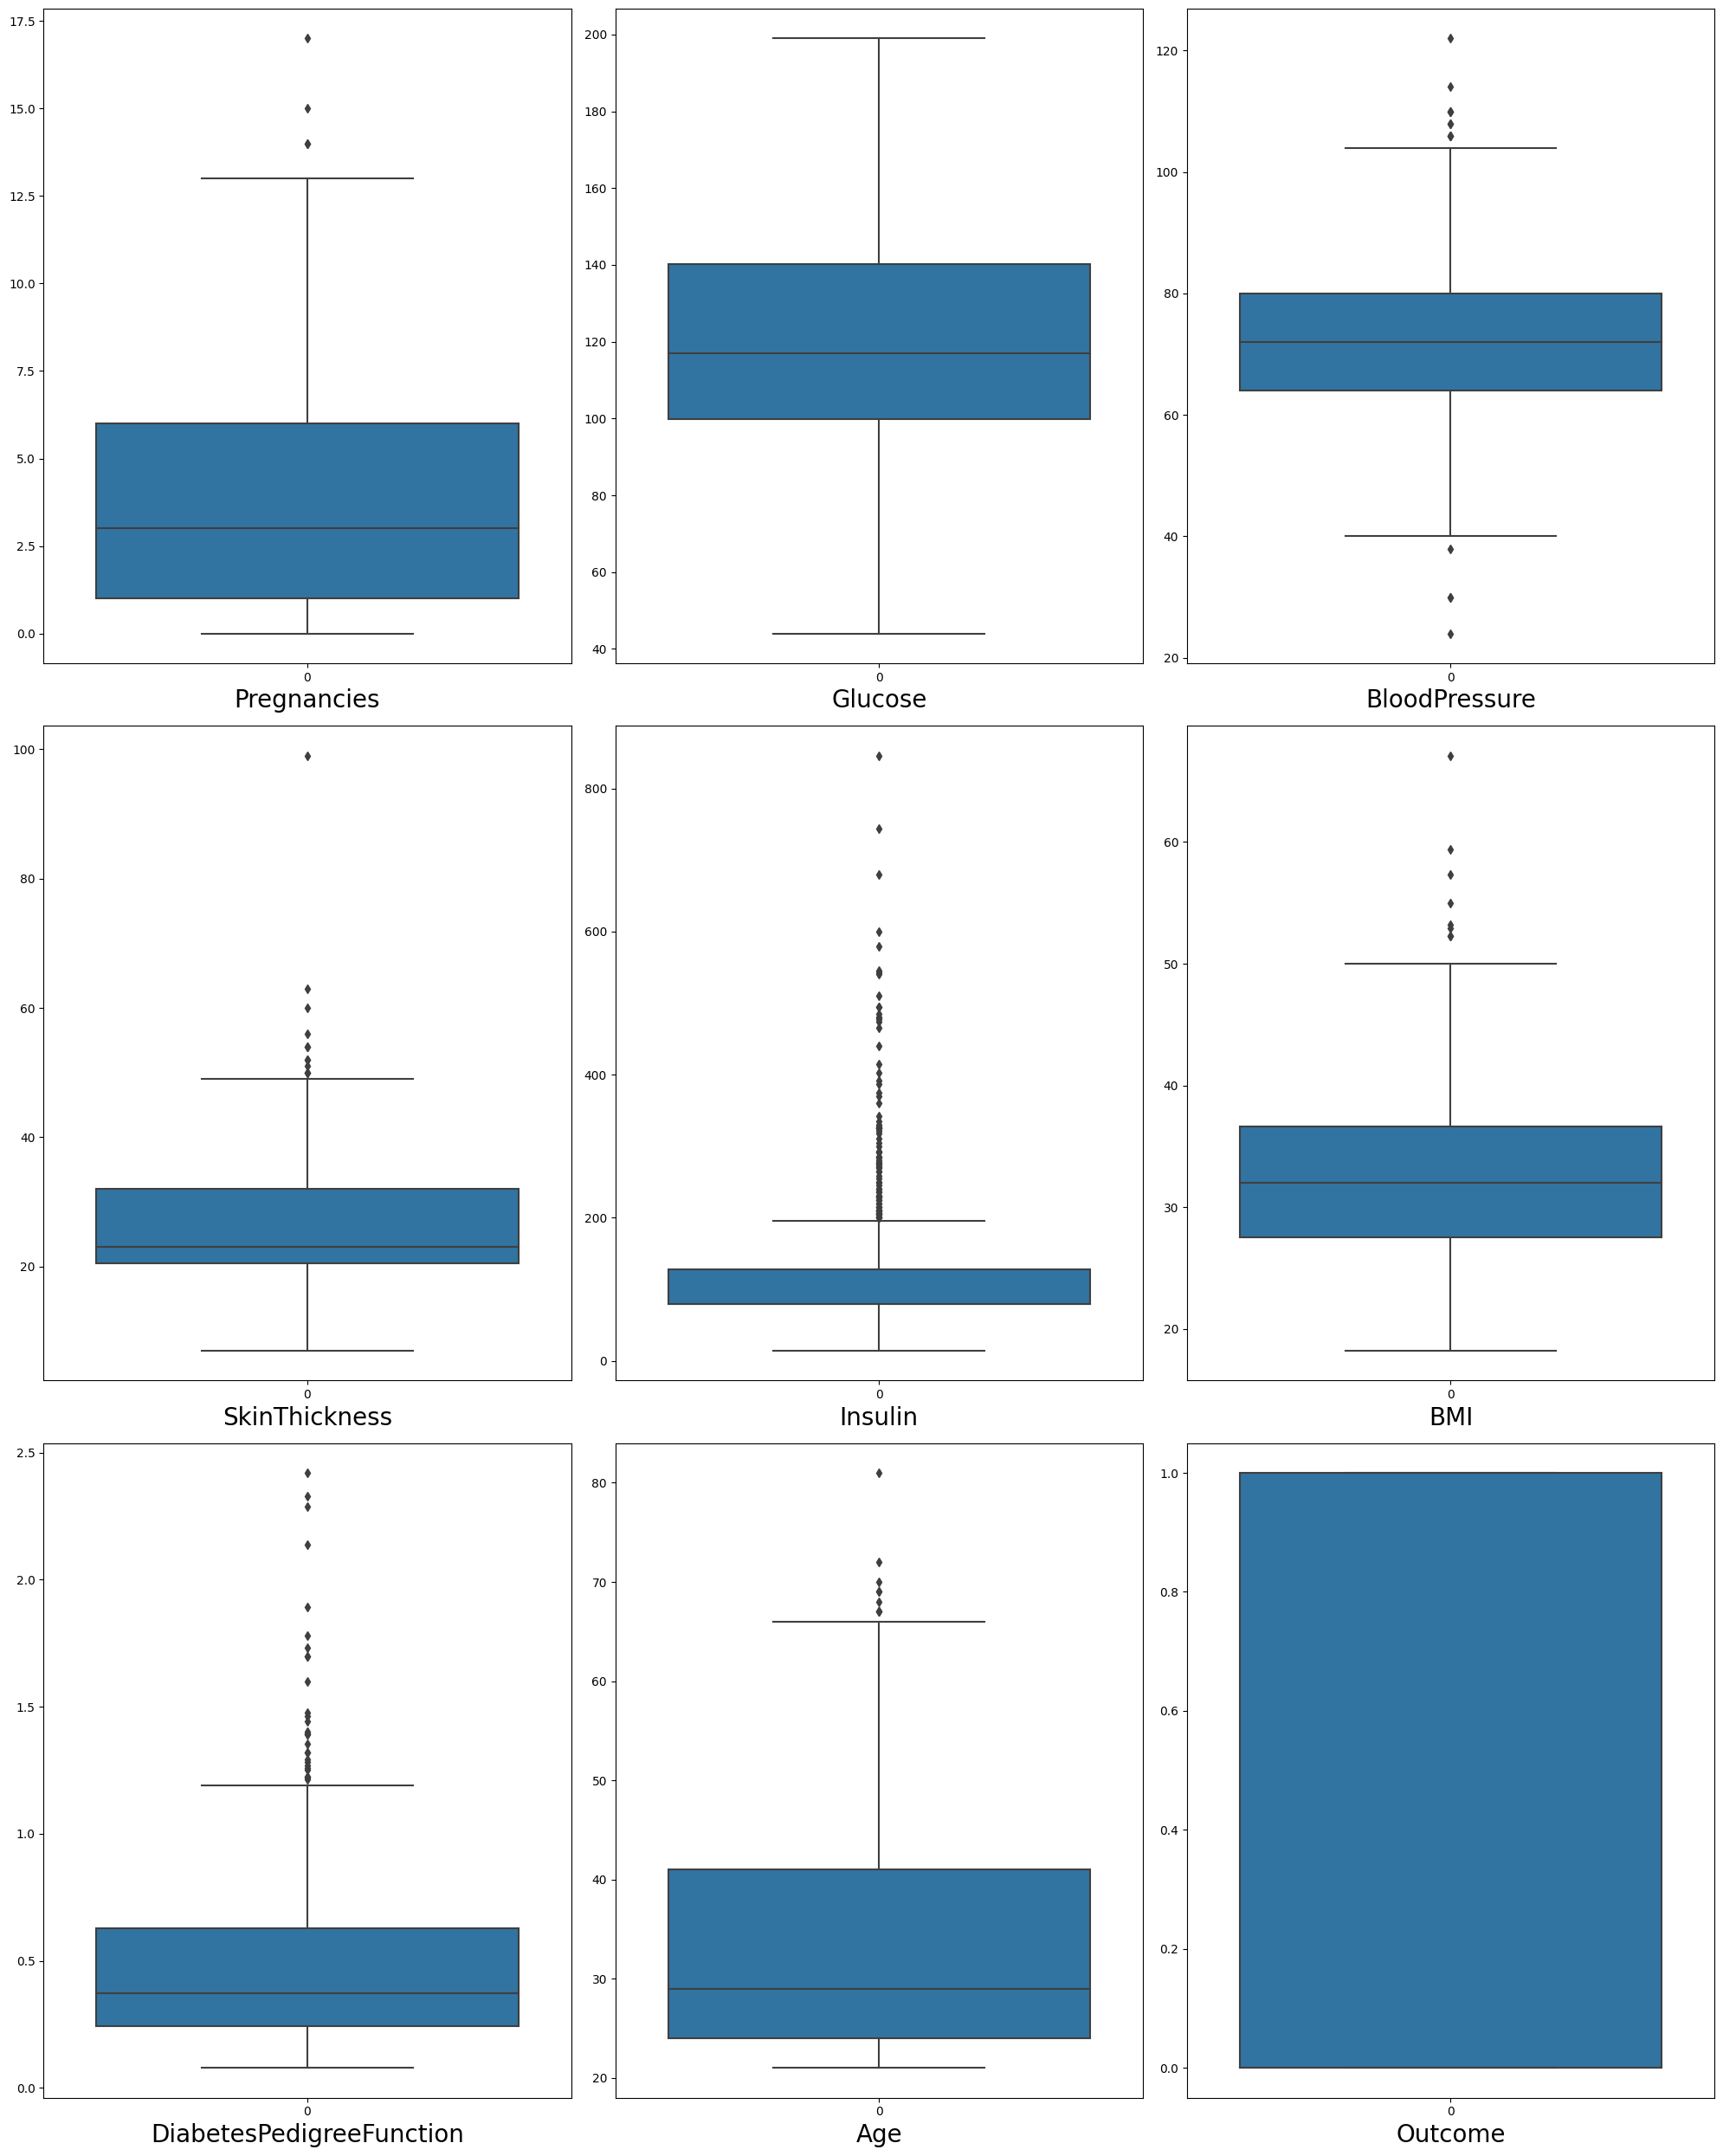

In [94]:
# Checking for the outliers
# Lets see how the data is distributed for avery column
plt.figure(figsize=(20,25),facecolor ='white')
plotnumber =1

for column in data:
  if plotnumber<=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column,fontsize=20)

  plotnumber+=1
plt.tight_layout()

Before treating the outliers check the percentage of the same.

If the outliers are more than 5% than do not treat them and vise versa

## **Feature Selection**

<Axes: >

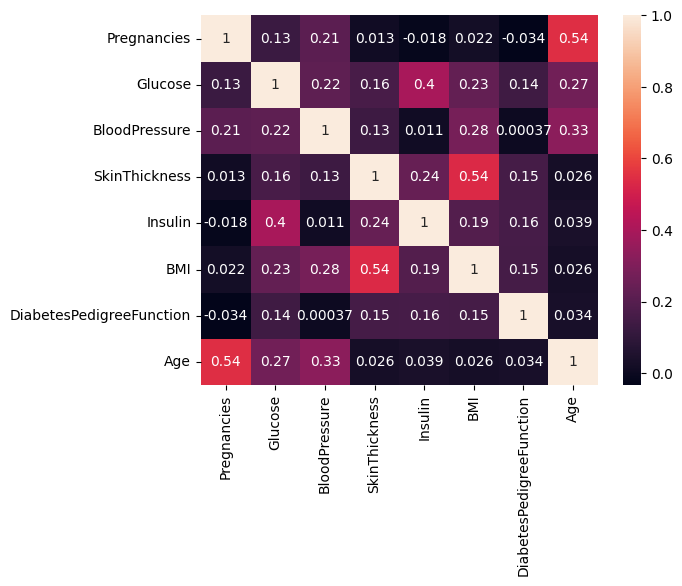

In [95]:
# Steps to follow in feature selection
sns.heatmap(data.drop('Outcome',axis=1).corr(),annot=True) # checking the correlation
## No correlated features are present

In [96]:
# checking the duplicated columns
data.duplicated().sum()  # No duplicate rows found

0

## **Model Creation**

In [97]:
# Creating Dependent and Independent Features
X = data.drop('Outcome',axis=1)  # Independent Variable
y = data.Outcome  # Dependent Variable

In [98]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [99]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### **Scaling the Data**

In [100]:
scalar = StandardScaler()  # object creation
X_scaled = scalar.fit_transform(X)  # scaling independent variables

In [101]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29849289,
        -0.47378505, -0.87137393]])

## **Training and Testing Data**

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=355)

## **Model Creation**

In [103]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [104]:
# Lets Predict the Data

In [105]:
y_train_pred = lr.predict(X_train)

In [106]:
y_pred = lr.predict(X_test)

In [107]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [108]:
y_train.shape

(576,)

In [109]:
y_pred.shape

(192,)

In [110]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score

In [111]:
# accuracy score for train data
acc_train_score =accuracy_score(y_train,y_train_pred)
acc_train_score

0.7881944444444444

In [112]:
acc_score = accuracy_score(y_test,y_pred)  # accuracy on test data
acc_score

0.7552083333333334

In [113]:
# Precision Score on test data

In [114]:
precision_score = precision_score(y_test,y_pred)

In [115]:
# Recall Score on test data
recall_score = recall_score(y_test,y_pred)

In [116]:
F1_score = f1_score(y_test,y_pred)
F1_score

0.5982905982905983

In [117]:
# Area Under Curve
roc_auc = roc_auc_score(y_test,y_pred)
roc_auc

0.7011940298507463

In [118]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[110,  15],
       [ 32,  35]])

In [119]:
# confusion matrix
pd.crosstab(y_test,y_pred)

col_0,0,1
Outcome,,
0,110,15
1,32,35


In [120]:
# Classification Report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.70      0.52      0.60        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



## **ROC PLOT**

In [121]:
## Predicting the probablity of class 1
probs = lr.predict_proba(X_test)[:,1]

In [122]:
probs

array([0.18243   , 0.28820173, 0.31665968, 0.29286437, 0.09693971,
       0.30599297, 0.17941451, 0.17408322, 0.41531578, 0.45643148,
       0.10832433, 0.04511336, 0.35651902, 0.90120932, 0.96147883,
       0.21691138, 0.45573239, 0.07071393, 0.30882187, 0.01138021,
       0.05961529, 0.68528893, 0.3251471 , 0.0312746 , 0.39209762,
       0.38023383, 0.39629187, 0.09966132, 0.09937977, 0.08864297,
       0.48278554, 0.63779831, 0.80566265, 0.23650627, 0.17488684,
       0.03657633, 0.33182245, 0.06098111, 0.10906914, 0.039913  ,
       0.1788464 , 0.05673649, 0.26093562, 0.79361045, 0.28753066,
       0.08795834, 0.09044434, 0.05647883, 0.20120416, 0.41760044,
       0.17699435, 0.85473879, 0.28297603, 0.20687931, 0.64649111,
       0.03049421, 0.45570249, 0.03431363, 0.89340062, 0.11896232,
       0.06408119, 0.07360551, 0.6503299 , 0.63392155, 0.66595918,
       0.72250396, 0.78771707, 0.08187196, 0.04096865, 0.25976959,
       0.13416746, 0.13371641, 0.86213538, 0.94488651, 0.44833

In [130]:
# Defining the Threshold limit
def predict_threshold(model,X_test,thresholds):
  return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)



In [131]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1): # it will create an array from range 0 to 1 with step 0.1
  y_predict = predict_threshold(lr,X_test,thr) # it will check result for each threshold from 0 to 1
  print("Threshold :",thr) # printing threshold
  print(confusion_matrix(y_test,y_pred)) # confusion matrix for each matrix

Threshold : 0.0
[[110  15]
 [ 32  35]]
Threshold : 0.1
[[110  15]
 [ 32  35]]
Threshold : 0.2
[[110  15]
 [ 32  35]]
Threshold : 0.30000000000000004
[[110  15]
 [ 32  35]]
Threshold : 0.4
[[110  15]
 [ 32  35]]
Threshold : 0.5
[[110  15]
 [ 32  35]]
Threshold : 0.6000000000000001
[[110  15]
 [ 32  35]]
Threshold : 0.7000000000000001
[[110  15]
 [ 32  35]]
Threshold : 0.8
[[110  15]
 [ 32  35]]
Threshold : 0.9
[[110  15]
 [ 32  35]]


In [132]:
## Visualizing the ROC plot
def plot_roc_curve(fpr,tpr): # function to plot roc curve
 plt.plot(fpr,tpr,color='orange',label='ROC') # line plot between fpr and tpr
 plt.plot([0,1],[0,1],color='darkblue',linestyle='dashed')
 plt.xlabel("False Positive Rate") # assigning name to x axis
 plt.ylabel("True Positive Rate") # assigning name to y axis
 plt.title("Receiver Operating Characteristic(ROC) Curve") # assigning name to curve
 plt.legend() # areas describing elemnets of graph
 plt.show() # to show graph withput location

In [136]:
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(y_test,probs)
print('AUC.%2f' %auc)

AUC.0.838925


In [137]:
fpr,tpr,threshold = roc_curve(y_test,probs)

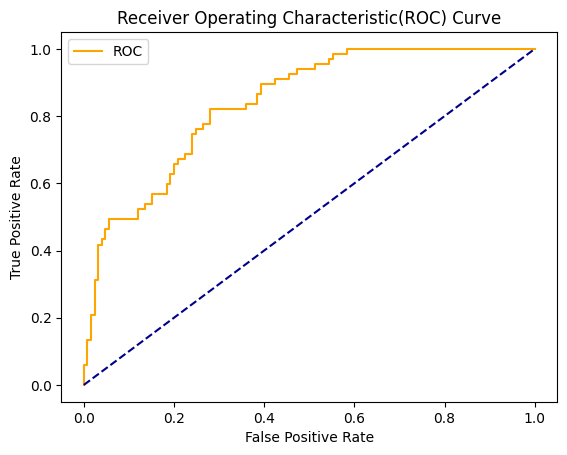

In [138]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr,tpr)

# **Thank You**